In [1]:
"""Create a random forest model using the elemental features."""

import pandas as pd
csv_data_source = '/home/dts/Documents/hu/jraph_MPEU/other_models/test_aflow_data.csv'

# Read the data into a dataframe:
aflow_df = pd.read_csv(csv_data_source, index_col=0)

aflow_df.describe()

,spacegroup_relax,Egap,ldau_type,energy_cutoff,energy_atom,density,volume_cell
count,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000,9256.000000
mean,103.097882,1.268404,1.493086,510.544911,-4.978751,4.877792,408.635160
std,76.780812,0.425912,0.870028,155.573732,1.630500,1.722004,391.813904
min,1.000000,0.500400,0.000000,228.300000,-11.273700,0.782568,18.875600
25%,19.000000,0.904600,0.000000,392.000000,-6.202512,3.684633,142.089250
50%,82.000000,1.273550,2.000000,560.000000,-4.853010,4.691305,284.405500
75%,167.000000,1.638525,2.000000,560.000000,-3.787157,5.953200,541.149750
max,230.000000,2.000000,2.000000,980.000000,0.826401,13.319700,3709.970000


In [2]:
atomic_data_csv = '/home/dts/Documents/hu/jraph_MPEU/other_models/really_tight_full_cut20_revpbe.csv'
atomic_data_df = pd.read_csv(atomic_data_csv, index_col=0)
atomic_data_df.describe()

,EA_half,IP_half,EA_delta,IP_delta,HOMO,LUMO,rs,s index,rp,p index,rd,d index,rf,f index
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.133439,8.005121,-0.276244,7.872389,-4.412885,-2.309800,1.406116,25.156863,1.647025,28.127451,1.383523,26.362745,0.186491,11.098039
std,1.359551,3.559766,1.343094,3.666094,2.365497,1.747167,0.506212,14.989597,0.779726,17.167591,1.666488,14.852269,0.681919,17.397798
min,-3.640255,3.862009,-3.854484,-1.081840,-15.794577,-7.092348,0.296000,1.000000,0.253600,3.000000,0.217800,7.000000,0.000000,0.000000
25%,-0.729464,5.777463,-0.823264,5.710877,-5.509590,-3.280970,1.011200,15.000000,1.017175,16.000000,0.547950,11.000000,0.000000,0.000000
50%,-0.146451,6.960471,-0.293942,6.968635,-3.744841,-2.088304,1.424900,24.000000,1.714200,25.000000,1.062300,20.000000,0.000000,0.000000
75%,0.577931,8.862555,0.386024,8.922061,-2.787848,-1.328261,1.800150,40.000000,2.285250,41.000000,1.338225,36.000000,0.275100,28.000000
max,3.747625,26.826802,3.744398,27.066837,-1.397061,2.031140,2.571500,51.000000,4.467100,57.000000,9.999900,55.000000,6.721800,53.000000


In [3]:
# Make sure we have all of the AFLOW columns:

print(aflow_df.columns)

Index(['compound', 'auid', 'aurl', 'spacegroup_relax', 'Pearson_symbol_relax',
       'Egap', 'catalog', 'dft_type', 'ldau_type', 'energy_cutoff',
       'energy_atom', 'density', 'volume_cell'],
      dtype='object')


In [87]:
# Ok now we want to create a new dataframe with the atomic features added in.
# Import our data prep module.
import data_prep as dp


data_prep_obj = dp.DataPrep(
    ase_db_path='/None',
    functional='pbe')

features_list = ['EA_half', 'IP_half', 'HOMO', 'LUMO', 'rs', 'rp']
compound_name_list = aflow_df['compound']

feature_engineered_data_df_with_compound = data_prep_obj.get_features_df(
    compound_name_list=compound_name_list, features_list=features_list)


In [88]:
print(feature_engineered_data_df.columns)
feature_engineered_data_df = feature_engineered_data_df_with_compound.drop(columns=['compound_name'])

y_data = aflow_df['Egap']

Index(['level_0', 'index', 'EA_half_bar', 'EA_half_hat', 'IP_delta_bar',
       'IP_delta_hat'],
      dtype='object')


In [52]:
feature_engineered_data_df.describe()

,EA_half_bar,EA_half_hat,IP_delta_bar,IP_delta_hat
count,9256.000000,9256.000000,9256.000000,9256.000000
mean,-1.208150,0.774384,9.680761,2.301876
std,0.669896,0.406184,1.853406,1.288209
min,-3.582329,0.000000,0.279914,0.000000
25%,-1.465844,0.507168,8.409876,1.377871
50%,-1.177709,0.724954,9.573205,2.144169
75%,-0.877113,1.027378,10.937456,3.098954
max,0.942956,2.579423,16.839823,8.192033


In [53]:
feature_engineered_data_df.columns

Index(['EA_half_bar', 'EA_half_hat', 'IP_delta_bar', 'IP_delta_hat'], dtype='object')

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    feature_engineered_data_df, y_data, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(max_depth=50, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, random_state=42)

In [56]:
y_pred = regr.predict(X_test)

In [57]:
# Now get statistics on the fit:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The mean root squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')

The mean absolute error of the fit is: 0.19399599942241136
The mean root squared error of the fit is: 0.28860597130359533


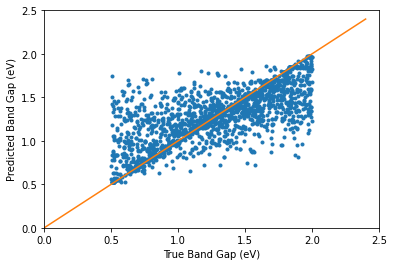

In [58]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')

# What happens if we predict the mean

In [59]:
# What happens if we simply predict the mean of the data? What MAE do we get?
y_mean = np.mean(y_train)
y_mean_vec = np.ones(len(y_test))*y_mean
print(f'The mean absolute error of predicting the mean is: {mean_absolute_error(y_test, y_mean_vec)}')


The mean absolute error of predicting the mean is: 0.36110752654860545


# Linear Model

In [97]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(f' the regression test R2 score is: {reg.score(X_test, y_test)}')
print(f'The reg.coef_ is: {reg.coef_}')
print('The reg.intercept_ is {reg.intercept_}')

y_pred= reg.predict(X_test)

 the regression test R2 score is: 0.08235754416807184
The reg.coef_ is: [-0.02285932  0.0876495   0.02528481  0.0580379 ]
The reg.intercept_ is {reg.intercept_}


The mean absolute error of the fit is: 0.34693901362175134
The mean root squared error of the fit is: 0.40558921670513887


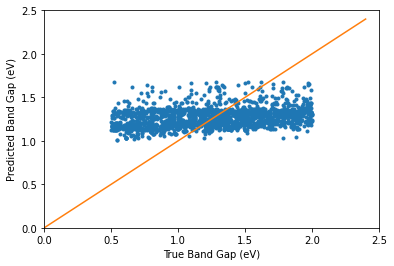

In [98]:
print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The mean root squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')

# Correlation of Features

In [93]:
import seaborn as sns
# feature_engineered_data_df = feature_engineered_data_df.reset_index()
# aflow_df = aflow_df.reset_index()

print(type(aflow_df.compound[0]))
print(feature_engineered_data_df_with_compound.columns)
feature_engineered_data_df_with_compound = feature_engineered_data_df_with_compound.rename(
    columns={"compound_name": "compound"})
combined_df = pd.merge(feature_engineered_data_df_with_compound, aflow_df, on='compound', how='outer')

print(combined_df.columns)
combined_df = combined_df.drop(
    columns=['aurl', 'ldau_type', 'auid', 'compound', 'spacegroup_relax', 'Pearson_symbol_relax',
             'catalog', 'dft_type', 'energy_atom', 'level_0', 'index'])
print(combined_df.columns)

print(combined_df)


<class 'str'>
Index(['EA_half_bar', 'EA_half_hat', 'IP_delta_bar', 'IP_delta_hat',
       'compound'],
      dtype='object')
Index(['EA_half_bar', 'EA_half_hat', 'IP_delta_bar', 'IP_delta_hat',
       'compound', 'level_0', 'index', 'auid', 'aurl', 'spacegroup_relax',
       'Pearson_symbol_relax', 'Egap', 'catalog', 'dft_type', 'ldau_type',
       'energy_cutoff', 'energy_atom', 'density', 'volume_cell'],
      dtype='object')
Index(['EA_half_bar', 'EA_half_hat', 'IP_delta_bar', 'IP_delta_hat', 'Egap',
       'energy_cutoff', 'density', 'volume_cell'],
      dtype='object')
       EA_half_bar  EA_half_hat  IP_delta_bar  IP_delta_hat    Egap  \
0        -1.350454     0.451128      9.935426      1.811220  0.5004   
1        -1.350454     0.451128      9.935426      1.811220  0.5246   
2        -1.350454     0.451128      9.935426      1.811220  0.5260   
3        -1.350454     0.451128      9.935426      1.811220  0.5414   
4        -1.350454     0.451128      9.935426      1.811220  0.

<AxesSubplot:title={'center':'Correlation Plot'}>

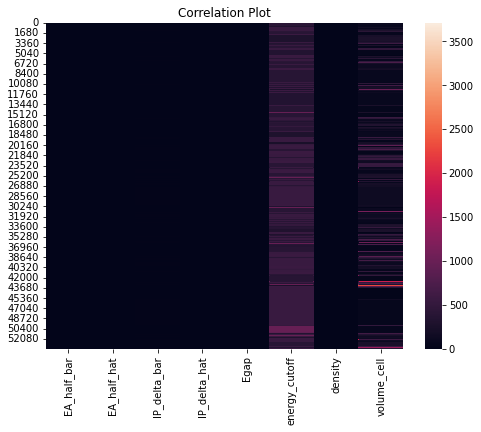

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(combined_df)